# KMeans Clustering Lab - CS 4372

In this lab, we will apply the K-means algorithm on synthetic as well as real dataset and also learn about machine learning pipelines.

You will need to complete the steps mentioned below and turn in the completed notebook. You can share the link of the finished notebook.

# Generate Synthetic Dataset Suitable For Clustering
We will use the following snippet to load libraries and generate some synthetic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
n_samples = 500
random_state = 170

X, y = make_blobs(n_samples=n_samples, n_features=2,
                  centers=3, random_state=random_state)


Let's plot this 2-D dataset

<Axes: >

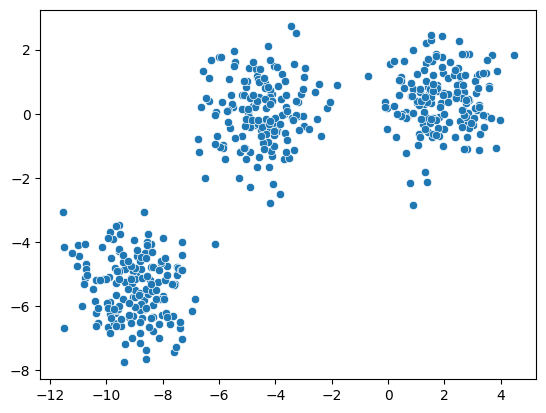

In [3]:
sns.scatterplot(x=X[:,0], y=X[:,1])

## Clustering using k-means

Let's go back to the 2-D dataset generated earlier and let's try to cluster it using k-means. We know how many clusters are *actually* there.

In [6]:
predicted_clusters = 2 # need to play with this to get the correct value
max_iter = 100
random_state = 42

km = KMeans(n_clusters=predicted_clusters, random_state=random_state, max_iter=max_iter)

In [7]:
km

KMeans(max_iter=100, n_clusters=2, random_state=42)

In [8]:
y_pred = km.fit_predict(X)

## Visualization of Clusters

Let's create side-by-side plots of actual vs clustered data
for the clustered data, we also want to include the predicted centers

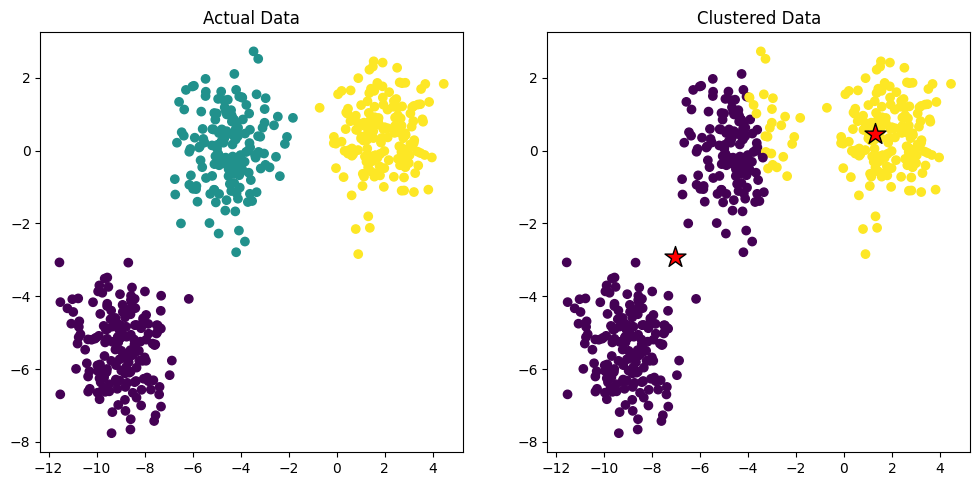

In [9]:


plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Actual Data")

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Clustered Data")

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.show()

## WCSS and Silhouette Score

Let's compute the evaluation criteria for clustering: WCSS and Silhouette score

In [10]:
km.inertia_

5023.038430111416

In [11]:
silhouette_score(X, y_pred)

np.float64(0.5577840118427834)

## Finding Best Hyperparameters

We want to automatically try various values of the hyperparameter k and obtain the evaluation criteria to see which values are the best.

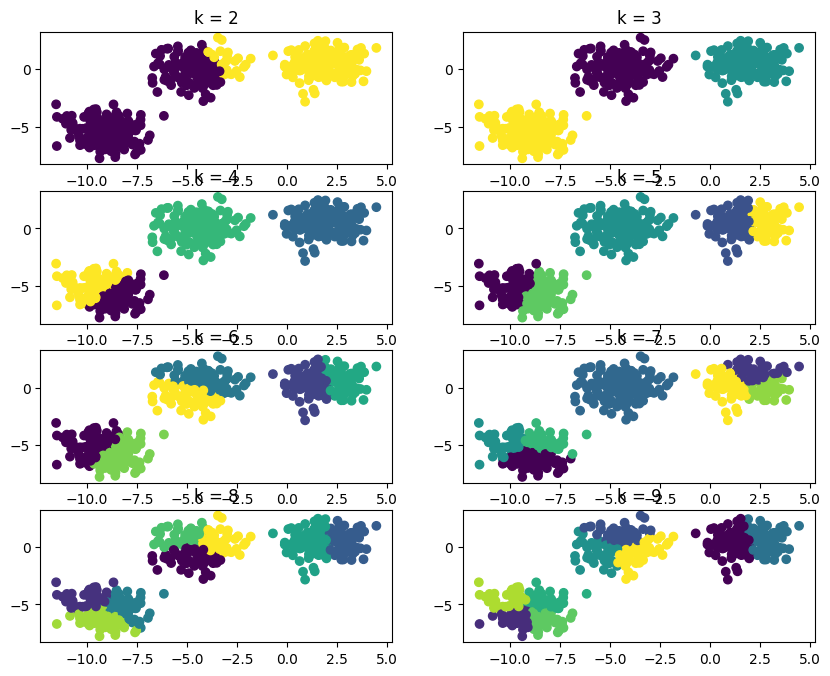

In [12]:
plt.figure(figsize=(10, 10))

i = 1
for k in range(2, 10):
  km = KMeans(n_clusters=k)
  y_pred = km.fit_predict(X)
  plt.subplot(5, 2, i)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred)
  plt.title("k = " + str(k))
  i = i + 1

plt.show()